In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt


In [2]:
iris = load_iris()
X = iris.data
y = (iris.target == 0).astype(int)   # 1 = Setosa, 0 = Not Setosa


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [5]:
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(4,)))
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs=30, batch_size=5, validation_split=0.2, verbose=1)


Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.6972 - loss: 0.6053 - val_accuracy: 0.7917 - val_loss: 0.4916
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8289 - loss: 0.4995 - val_accuracy: 0.8750 - val_loss: 0.4529
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8856 - loss: 0.4428 - val_accuracy: 0.9167 - val_loss: 0.4184
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8789 - loss: 0.4605 - val_accuracy: 0.9167 - val_loss: 0.3861
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9094 - loss: 0.3736 - val_accuracy: 0.9167 - val_loss: 0.3536
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8987 - loss: 0.3489 - val_accuracy: 0.9167 - val_loss: 0.3247
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8821 - loss: 0.3655 - val_accuracy: 0.9167 - val_loss: 0.2987
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9586 - loss: 0.2924 - val_accuracy: 0.9583 - va

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 1.0000 - loss: 0.0451

✅ Test Accuracy: 1.0


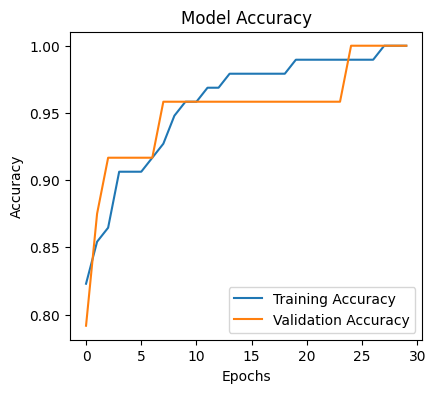

In [7]:
loss, accuracy = model.evaluate(X_test, y_test)
print("\n✅ Test Accuracy:", accuracy)

# training progress
plt.figure(figsize=(10,4))

# accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


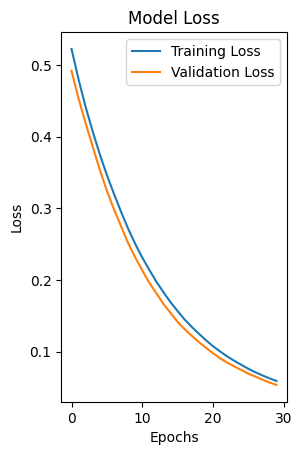

In [11]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [12]:
y_pred = (model.predict(X_test) > 0.5).astype(int)
print("\nPredicted Labels:", y_pred[:10].flatten())
print("Actual Labels:   ", y_test[:10])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step

Predicted Labels: [0 1 0 0 0 1 0 0 0 0]
Actual Labels:    [0 1 0 0 0 1 0 0 0 0]
